In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv
/kaggle/input/ids-isa/Phase2.csv


In [2]:
ds = pd.read_csv('/kaggle/input/ids-isa/Phase2.csv')



In [3]:
ds.head()
ds.shape
ds['class'].value_counts()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [4]:
ds.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
print(ds.shape)
ds.drop_duplicates()
print(ds.shape)
# no duplicates found


(25192, 42)
(25192, 42)


In [6]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from pandas.api.types import is_numeric_dtype

te = TargetEncoder()
le = LabelEncoder()

ds['class'] = le.fit_transform(ds['class'])
for col in ds.columns:
    if col != 'class' and not is_numeric_dtype(ds[col]):
        ds[col] = te.fit_transform(ds[col],ds['class'])

In [7]:
ds.sample(4)
ids = ds.to_csv('ids.csv')

standard scaler does mean centering of the data

In [8]:
#for col in ds.columns:
#    print(np.mean(ds[col]))
    
print(np.mean(ds['dst_host_srv_rerror_rate']))

0.1187694506192442


In [9]:
ds.sample(6)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
19009,5,0.520364,0.959282,0.845722,11556,1383,0,0,0,0,...,164,0.81,0.06,0.02,0.01,0.0,0.0,0.00,0.00,1
4348,0,0.520364,0.945146,0.845722,204,2674,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1
23094,0,0.520364,0.945146,0.845722,155,4187,0,0,0,0,...,184,1.00,0.00,0.01,0.00,0.0,0.0,0.01,0.01,1
21184,0,0.520364,0.011682,0.011414,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.0,1.0,0.00,0.00,0
15624,0,0.520364,0.945146,0.845722,316,4061,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,1
17663,0,0.520364,0.945146,0.845722,284,7195,0,0,0,0,...,255,1.00,0.00,0.10,0.04,0.0,0.0,0.00,0.00,1


In [10]:
ds.head()
ds['count'].head()

0      2
1     13
2    123
3      5
4     30
Name: count, dtype: int64

In [11]:
ds.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = ds.drop('class',axis=1)
y = ds['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [13]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()

lor.fit(X_train,y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = lor.predict(X_test)
ypr = y_pred.copy()


In [15]:
ypr = pd.DataFrame(ypr)


In [16]:
ypr.head()

,0
0,0
1,1
2,0
3,1
4,1


In [17]:
yprr = ypr.to_csv('yprr.csv')

In [18]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3434
           1       0.98      0.96      0.97      4124

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [20]:
y_pred2 = knn.predict(X_test)

In [21]:
ypr2 = pd.DataFrame(y_pred2)

In [22]:
yprr2 = ypr2.to_csv('yprr2.csv')

In [23]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3499
           1       0.99      0.99      0.99      4059

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [24]:
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [25]:
model = keras.Sequential([
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = 'accuracy'
             )
model.fit(X_train,y_train,epochs=35,validation_data=(X_test,y_test))

Epoch 1/35
552/552 [==============================] - 3s 3ms/step - loss: 0.2986 - accuracy: 0.8872 - val_loss: 0.1100 - val_accuracy: 0.9684
Epoch 2/35
552/552 [==============================] - 2s 4ms/step - loss: 0.1642 - accuracy: 0.9555 - val_loss: 0.0868 - val_accuracy: 0.9720
Epoch 3/35
552/552 [==============================] - 2s 3ms/step - loss: 0.1309 - accuracy: 0.9629 - val_loss: 0.0729 - val_accuracy: 0.9750
Epoch 4/35
552/552 [==============================] - 2s 3ms/step - loss: 0.1112 - accuracy: 0.9682 - val_loss: 0.0721 - val_accuracy: 0.9743
Epoch 5/35
552/552 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9711 - val_loss: 0.0643 - val_accuracy: 0.9761
Epoch 6/35
552/552 [==============================] - 1s 3ms/step - loss: 0.0907 - accuracy: 0.9714 - val_loss: 0.0648 - val_accuracy: 0.9768
Epoch 7/35
552/552 [==============================] - 1s 3ms/step - loss: 0.0794 - accuracy: 0.9722 - val_loss: 0.0630 - val_accuracy: 0.9763
Epoch 

In [26]:
# evaluating the model
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
predictions = (predictions > 0.32) 
pred_cat = np.argmax(predictions,axis=1)

print(confusion_matrix(y_test,predictions))


237/237 [==============================] - 0s 1ms/step
[[3437   70]
 [  18 4033]]


In [27]:
ypr3 = pd.DataFrame(predictions)

In [28]:
yprr3 = ypr3.to_csv('yprr3.csv')

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3507
           1       0.98      1.00      0.99      4051

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

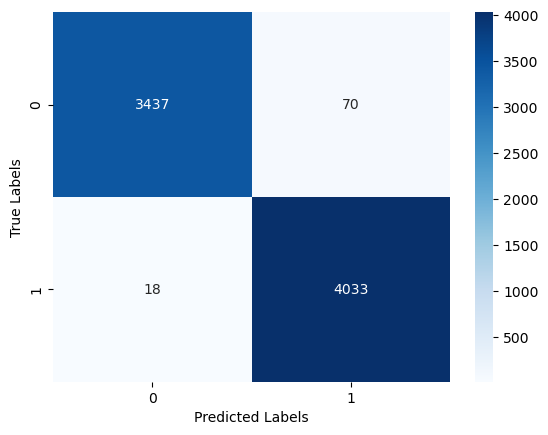

In [31]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [32]:
import pickle 

fh = "intrusion_detection.sav"
pickle.dump(lor,open(fh,'wb'))
print("done")

done


In [33]:
#loaded_model = pickle.load(open("intrusion_detection.sav","rb"))
#loaded_model 
